In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [23]:
#Load the data
oecd_bli=pd.read_csv('oecd_bli_2015.csv',thousands=',')
gdp_per_capita=pd.read_csv('gdp_data.csv',thousands=',',delimiter='\t',encoding='latin1',na_values='n/a')

In [24]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [25]:
#prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [38]:
print('X:',X)
print('______________')
print('Y:',y)

X: [[ 8669.998]
 [ 9009.28 ]
 [ 9054.914]
 [ 9437.372]
 [12495.334]
 [13618.569]
 [14210.28 ]
 [15991.736]
 [17256.918]
 [17288.083]
 [18064.288]
 [19121.592]
 [20732.482]
 [25864.721]
 [27195.197]
 [29866.581]
 [32485.545]
 [35343.336]
 [37044.891]
 [37675.006]
 [40106.632]
 [40996.511]
 [41973.988]
 [43331.961]
 [43603.115]
 [43724.031]
 [43770.688]
 [49866.266]
 [50854.583]]
______________
Y: [[6.4]
 [6.5]
 [5.8]
 [5.5]
 [6.1]
 [5.9]
 [5.9]
 [6.2]
 [6.7]
 [5.7]
 [5.4]
 [5.4]
 [5.9]
 [6.3]
 [5.9]
 [6. ]
 [5.9]
 [7.2]
 [7.3]
 [6.5]
 [6.9]
 [7. ]
 [7.6]
 [7.4]
 [7.4]
 [7.1]
 [6.8]
 [7.3]
 [7.5]]


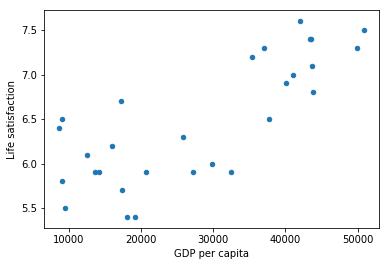

In [27]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [31]:
# Select a linear model
lin_reg_model = sklearn.linear_model.LinearRegression()

In [33]:
# Train the model
lin_reg_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(lin_reg_model.predict(X_new)) # outputs 

[[6.25984414]]
